# Прогнозирование оттока клиентов сети фитнес-центров

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

Задача - провести анализ клиентских анкет и подготовить план действий по удержанию клиентов.
А именно:
 * научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 * сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 * проанализировать основные признаки, наиболее сильно влияющие на отток;
 * сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.
    
Для анализа подготовлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
 * `'Churn'` — факт оттока в текущем месяце; 
 * Текущие поля в датасете:
   * Данные клиента за предыдущий до проверки факта оттока месяц:
    * `'gender'` — пол
    * `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
    * `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * `'Phone'` — наличие контактного телефона;
    * `'Age'` — возраст;
    * `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
   * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    * `'Group_visits'` — факт посещения групповых занятий;
    * `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    * `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Оглавление" data-toc-modified-id="Оглавление-2">Оглавление</a></span></li><li><span><a href="#Открытие-данных-" data-toc-modified-id="Открытие-данных--3">Открытие данных <a id="open_data"></a></a></span></li><li><span><a href="#Предобработка-данных-" data-toc-modified-id="Предобработка-данных--4">Предобработка данных <a id="preprocessing"></a></a></span><ul class="toc-item"><li><span><a href="#Замена-названий-столбцов" data-toc-modified-id="Замена-названий-столбцов-4.1">Замена названий столбцов</a></span></li><li><span><a href="#Поиск-дубликатов-" data-toc-modified-id="Поиск-дубликатов--4.2">Поиск дубликатов <a id="duplicates"></a></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)-" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)--5">Исследовательский анализ данных (EDA) <a id="eda"></a></a></span><ul class="toc-item"><li><span><a href="#Описание-признаков-" data-toc-modified-id="Описание-признаков--5.1">Описание признаков <a id="feachers_descriptions"></a></a></span></li><li><span><a href="#Гистограммы-и-распределения-признаков-для-тех,-кто-ушел-в-отток,-и-тех,-кто-остался-" data-toc-modified-id="Гистограммы-и-распределения-признаков-для-тех,-кто-ушел-в-отток,-и-тех,-кто-остался--5.2">Гистограммы и распределения признаков для тех, кто ушел в отток, и тех, кто остался <a id="hist"></a></a></span></li><li><span><a href="#Матрица-корреляций-" data-toc-modified-id="Матрица-корреляций--5.3">Матрица корреляций <a id="corr_matrix"></a></a></span></li><li><span><a href="#Диаграммы-рассеяния-" data-toc-modified-id="Диаграммы-рассеяния--5.4">Диаграммы рассеяния <a id="scatter"></a></a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-6">Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-7">Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-" data-toc-modified-id="Выводы--8">Выводы <a id="output"></a></a></span></li></ul></div>

## Оглавление

## Открытие данных <a id="open_data"></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

Откроем наш файл с данными и посмотрим на них:

In [2]:
data = pd.read_csv('C:/Users/Евгения/Documents/yandex.prakticum/project12_forecast/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В данных 4000 строк и 14 столбцов, которые занимают 437.6 Кб. Пропущенных значений нет. Все данные правильного типа данных. Названия столбцов можно привести к строчным буквам, чтобы было удобней с ними работать. 

## Предобработка данных <a id="preprocessing"></a>

### Замена названий столбцов

Заменем в названиях столбцов все прописные буквы на строчные.

In [5]:
data.columns= data.columns.str.lower()

In [6]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Замена названий столбцов прошла успешно.

### Поиск дубликатов <a id="duplicates"></a>

Посмотрим, есть ли в наших данных дубликаты.

In [7]:
data.duplicated().sum()

0

Дубликатов нет. Можем приступать к исследованию данных.

## Исследовательский анализ данных (EDA) <a id="eda"></a>

### Описание признаков <a id="feachers_descriptions"></a>

Вначале посмотрим на сами данные. Проверим, есть ли в них отсутствующие признаки, изучим средние значения и стандартрные отклонения.

In [8]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В нашем датафрейме имеются как числовые, так и категориальные признаки. 

К числовым признакам относятся: `contract_period`, `age`, `avg_additional_charges_total`, `month_to_end_contract`, `lifetime`, `avg_class_frequency_total`, `avg_class_frequency_current_month`. 

К категориальным признакам относятся: `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`, `churn`.
Категориальные признаки в нашем наборе данных принимают значения только 0 или 1. 

Теперь опишем средние значения и стандартные отклонения признаков.

В поле `gender` среднее значение 0.51, а стандартное отклонение 0.5 - то есть в данных примерно поровну мужчин и женщин. 

Большинство клиентов живет около финтнес-центра, так как среднее значение поля `near_location` составило 0.85, и уже на 25-ом процентеле значение этого поля - 1. 

Также примерно половина клиентов - это сотрудники компании-партнера сети фитнес-центров, то есть купили свой абонемент со скидкой, если смотреть на среднее значение поля `partner`, составившее 0.49. 

Также почти треть клиентов пришли по акции "приведи друга", то есть тоже пришли со скидкой на первый абонемент - среднее значение поля `promo_friends` составило 0.31, а стандартное отклонение 0.46. 

Среднее значение поля `phone` составило 0.9 - то есть почти все клиенты указали свой телефон. Однако 10% клиентов по каким-то причинам не стали указывать свой телефон. 

Средняя длительность текущего действующего абонемента составила 4.68 месяцев, однако половина клиентов купили абонемент только на 1 месяц, поэтому стандартное отклонение составило 4.55 месяцев. 

41% клиентов посещают групповые занятия судя по среднему значению поля `group_visits`.

Средний возраст клиентов сети фитнес-центров составил 29.2 года, а медиана - 29 лет, поэтому стандартное отклонение в поле `age` небольшое и составило 3.26 года. 

Среднее значение суммарной выручки от других услуг фитнес-центра составила 146.94, тогда как медиана - 136.22. Стандартное отклонение поля `avg_additional_charges_total` достаточно высокое и составило 96.36, то есть несколько выбросов с высокими значениями трат, максимальное значение составило 552.59. 

Среднее значение срока до окончания текущего действующего абонемента составило 4.32 месяца, а медиана - 1 месяц, поэтому стандартоное отклонение поля `month_to_end_contract` - 4.19 месяца. Значения этого поля практически совпадают со значениями длительности текущего абонемента. То есть эти клиенты только начали свои посещения по текущему действующему абонементу.

Среднее время с момента первого обращения в фитнес-центр составило 3.72 месяца, а медиана - 3 месяца. Среднее отклонение по полю `lifetime` сопоставимо со средним значением и составило 3.75 месяцев. Не смотря на то, что среднее и медиана близки друг к другу, видимо есть несколько пользователей, которые уже давно посещают эту сеть фитнес-центров. Максимальное значение в этом поле составило 31 месяц. 

Среднее значение средней частоты посещений в неделю за все время с начала действия абонемента составило 1.88 раз, а медиана - 1.83 раз. Стандартное отклонение поля `avg_class_frequency_total` составило 0.97 раз в неделю. Минимальное значение в этом поле 0, а максимальное - 6 раз в неделю.

Среднее значение средней частоты посещений в неделю за предыдущий месяц составило 1.77 раз в неделю, медиана - 1.72 раза - чуть меньше, чем за весь период. Видимо с течением времени энтузиазм заниматься у клиентов немного пропадает. Стандартное отклонение поля `avg_class_frequency_current_month` составило 1 раз в неделю, минимальное значение 0, а максимальное - 6.15 раз в неделю.

Среднее значение поля `churn` составило 0.27. То есть в отток уходит чуть больше четверти клиентов. Это целевая переменная, которую мы будем прогнозировать. Эта переменная не имеет временную структуру, поэтому мы просто случайным образом можем разделить нашу выборку на тренировочную и валидационную. 

Пропущенных значений в данных не наблюдается.

Теперь посмотрим на средние значения признаков тех, кто ушел в отток, и тех, кто остался.

In [9]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Средние значения поля `gender` составили 0.51, то есть примерно поровну мужчин и женщин было в обеих группах - тех, кто ушел в отток, и тех, кто остался.

Среднее значение поля `near_location` для тех, кто остался, состависло 0.87, а для тех, кто ушел - 0.77. То есть, чем дальше клиент живет от фитнес-центра, тем увеличивается вероятность, что он не вернется.

Среднее значение поля `partner` для тех, кто остался, составило 0.53, а для тех, кто ушел - 0.36. Получается, что только треть тех, кто ушел в отток, были сотрудниками компаний-партнеров сети финтнес-центров. Тогда как чуть больше половины тех, кто остался, были сотрудниками компаний-партнеров. А так как партнерство дает скидку для клиентов на абонементы, то отсуствие скидки влияет на то, что клиент может уйти в отток.

Среднее значение поля `promo_friends` для тех, кто остался, составило 0.35, а для тех, кто ушел в отток - 0.18. То есть тоже заметно влияние скидки на первый абонемент на то уйдет пользователь, или останется.

Среднее значение поля `phone` в обеих группах составило 0.9 - одинаково. 

Среднее значение длительности текущего действующего абонемента составило 5.7 месяцев для тех, кто остался, и 1.7 месяцев для тех, кто ушел. Получается, те кто возможно уйдет в отток предпочитают покупать абонемент на короткий период. 

Почти половина или 46% клиентов из тех, кто остался, посещали групповые занятия, а из тех, кто ушел, групповые зянятия посещали только 27% клиентов.

Средний возраст тех, кто остался, составил почти 30 лет, а тех, кто ушел - почти 27 лет. 

Суммарная выручка от других услуг фитнес центра у тех, кто остался, составила 158.5, а у тех, кто ушел - 115. Получается, те, кто остался, чуть больше тратили на дополнительные услуги. 

Среднее значение срока до окончания текущего действующего абонемента составил 5.3 месяца у тех, кто остался, и 1.7 месяцев для тех, кто ушел. Но это обусловлено тем, что те, кто остаются, покупают абонементы на более длительные сроки. 

Среднее число месяцев с момента первого обращения в финтнес-центр у тех, кто остался, составило 4.7 месяцев, а у тех, кто ушел - 1 месяц.  

Средняя частота посещений в неделю за все время у тех, кто остался, составила 2 раза в неделю, а у тех, кто ушел - 1,5 раза в неделю.

Средняя частота посещений в неделю за предыдущий месяц у тех, кто остался, составила 2 раза в неделю. То есть осталась такой же  как за все время. А у тех, кто ушел, средняя частота посещений в неделю за предыдущий месяц составила 1 раз в неделю, то есть снизилась относительно всего периода посещений. 

В целом можно сказать, что почти все средние значения признаков у тех, кто ушел в отток, снизились, кроме признаков наличия номера телефона и гендерной принадлежности.

### Гистограммы и распределения признаков для тех, кто ушел в отток, и тех, кто остался <a id="hist"></a>

Разделим наши данные на признаки и целевую переменную:

In [10]:
X = data.drop('churn', axis = 1)
y = data['churn']

Создадим датафрейм с русскими названиями, чтобы были понятными подписи на графиках.

In [11]:
feature_rus = ['Пол', 'Рядом фитнес-центр', 'Сотрудник компании-партнера клуба', 'Пришел по акции "приведи друга"', 'Телефон',
              'Длительность текущего абонемента, в месяцах', 'Посещал групповые занятия', 'Возраст', 
               'Cуммарная выручка от других услуг фитнес-центра', 'Срок до окончания текущего абонемента, в месяцах', 
              'Время с момента первого обращения в фитнес-центр, в месяцах', 
               'Средняя частота посещений в неделю за все время с начала действия абонемента', 
              'Средняя частота посещений в неделю за предыдущий месяц']

А также добавим тип переменной.

In [12]:
type = ['category', 'category', 'category', 'category', 'category', 'number', 
        'category', 'number', 'number', 'number', 'number', 'number', 'number']

In [13]:
feature_name = pd.DataFrame({'name': X.columns, 'rus_name': feature_rus, 'type': type})

In [14]:
feature_name

,name,rus_name,type
0,gender,Пол,category
1,near_location,Рядом фитнес-центр,category
2,partner,Сотрудник компании-партнера клуба,category
3,promo_friends,"Пришел по акции ""приведи друга""",category
4,phone,Телефон,category
5,contract_period,"Длительность текущего абонемента, в месяцах",number
6,group_visits,Посещал групповые занятия,category
7,age,Возраст,number
8,avg_additional_charges_total,Cуммарная выручка от других услуг фитнес-центра,number
9,month_to_end_contract,"Срок до окончания текущего абонемента, в месяцах",number


In [15]:
feature_name.query('type=="number"').count()

name        7
rus_name    7
type        7
dtype: int64

Построим теперь гистограммы всех признаков для тех, кто остался.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


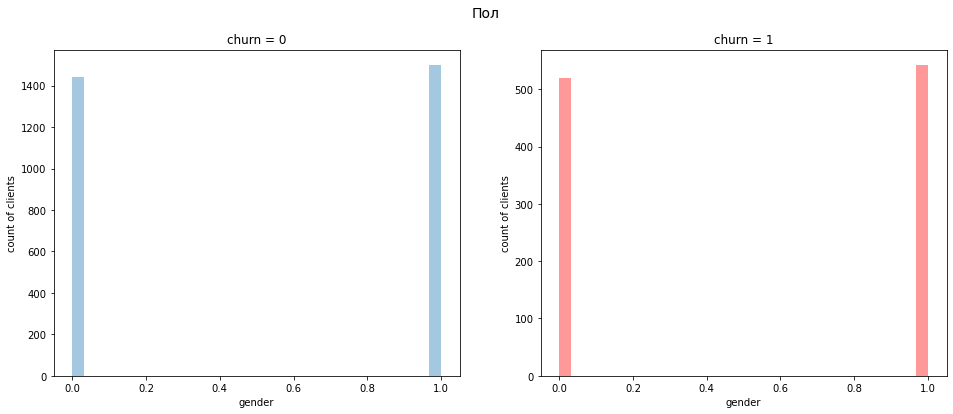

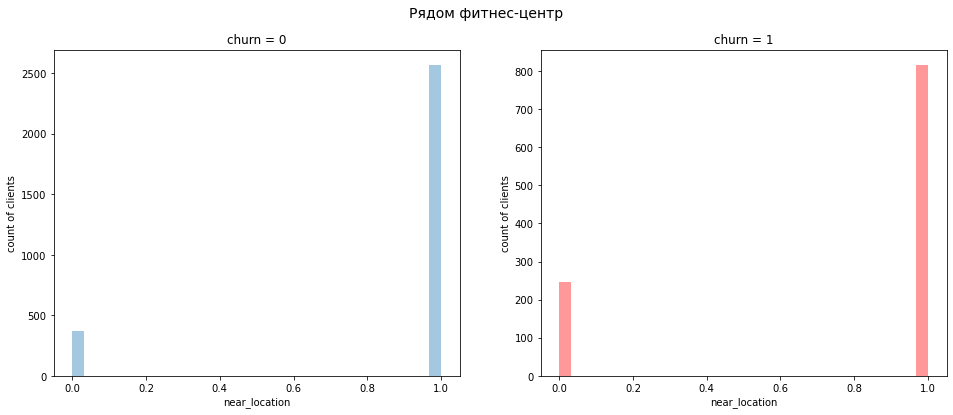

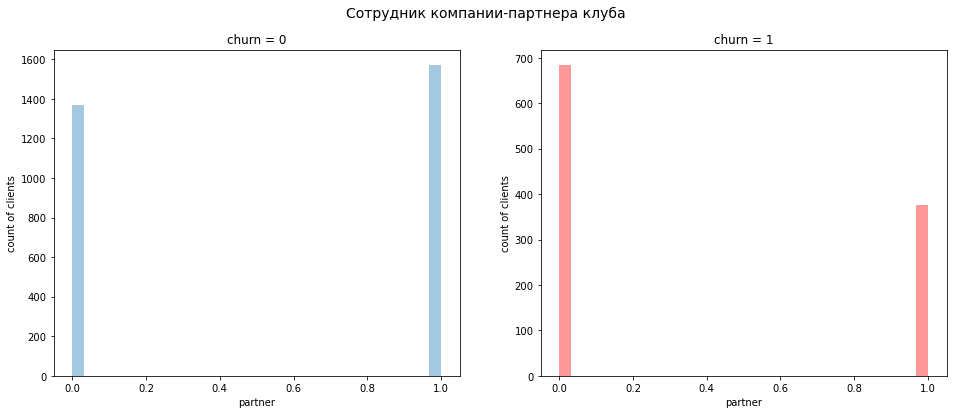

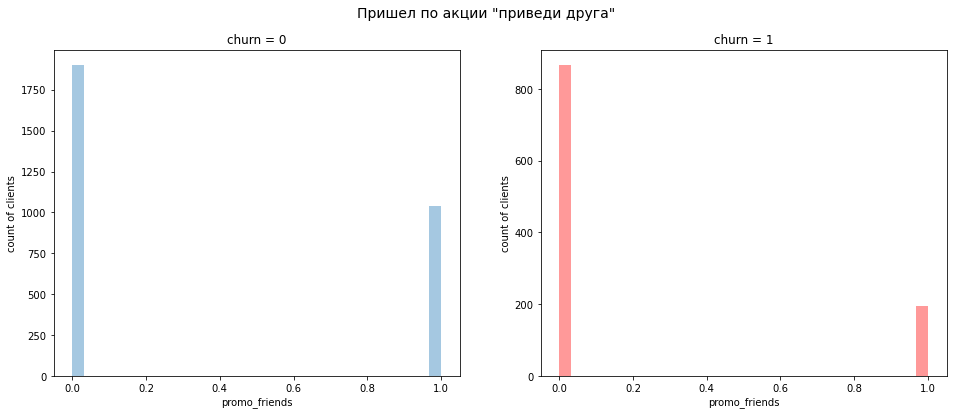

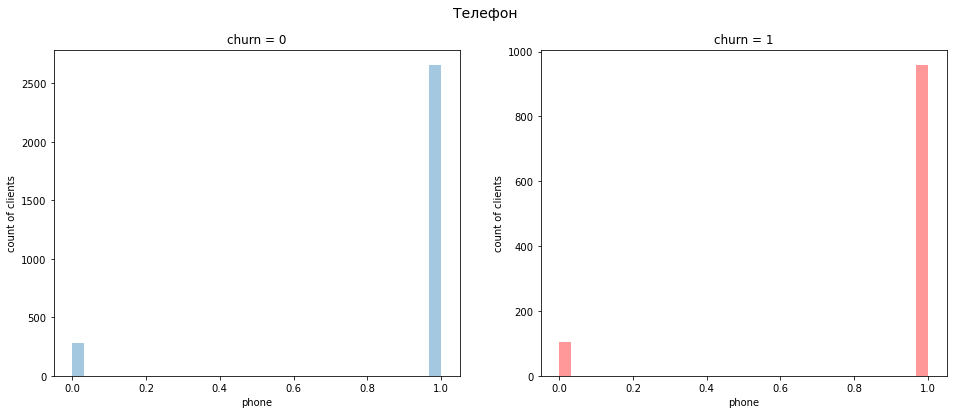

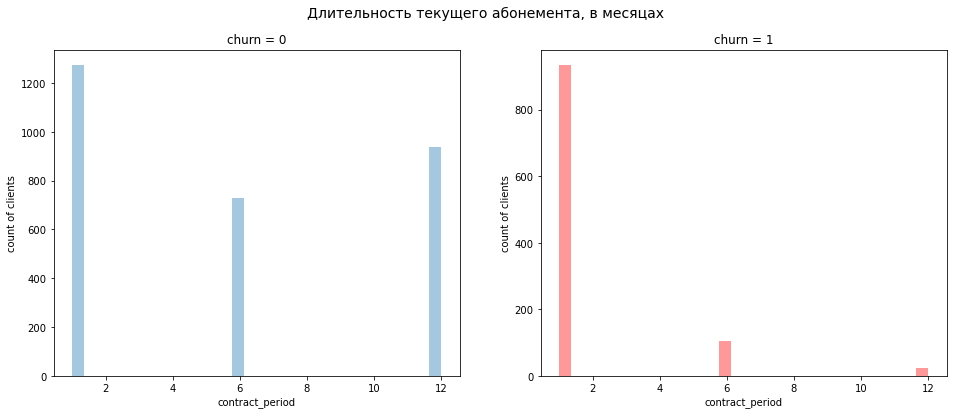

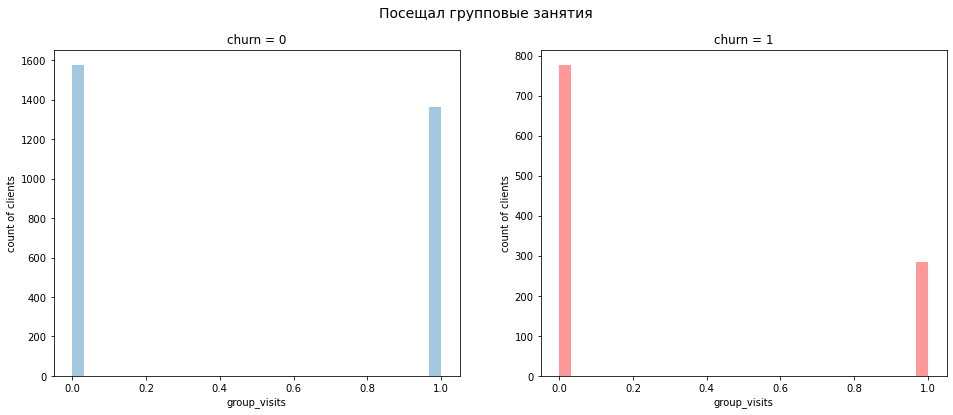

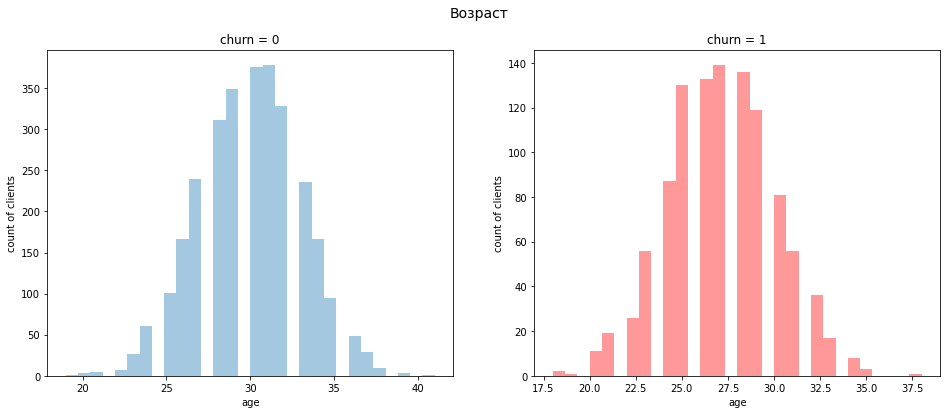

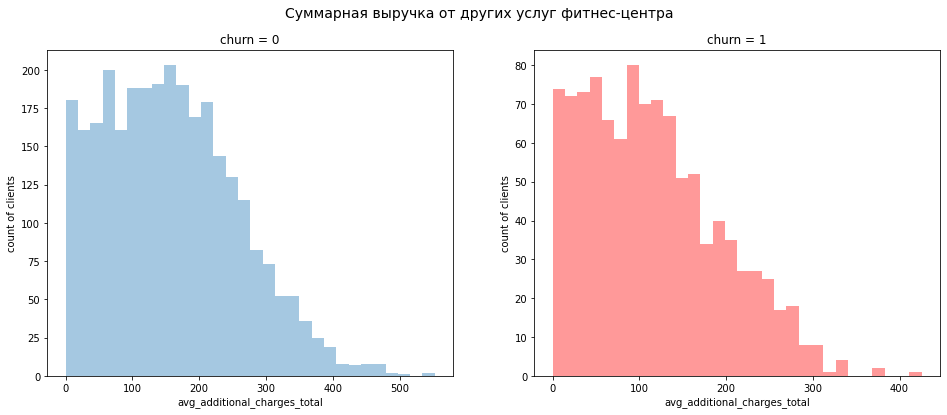

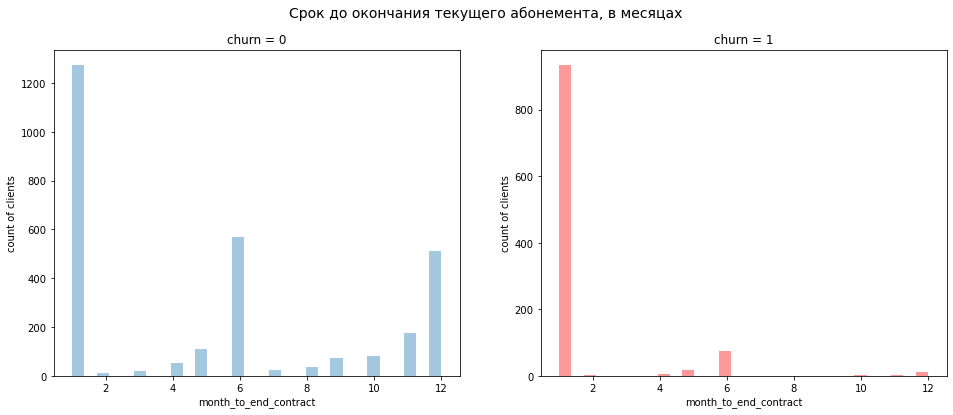

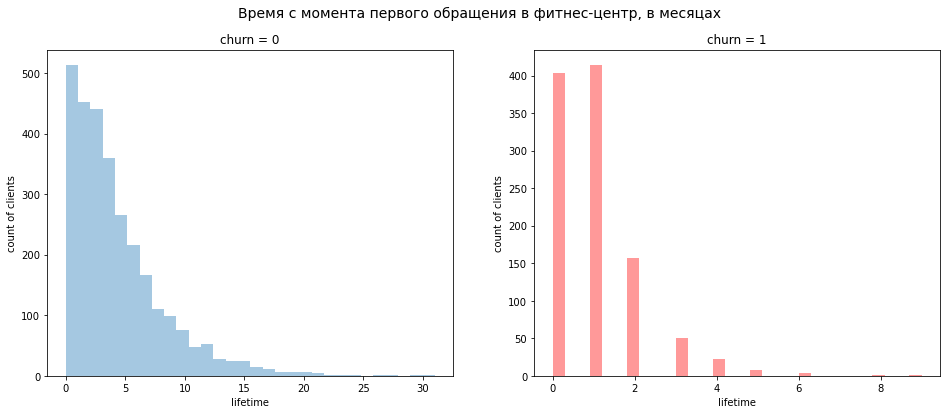

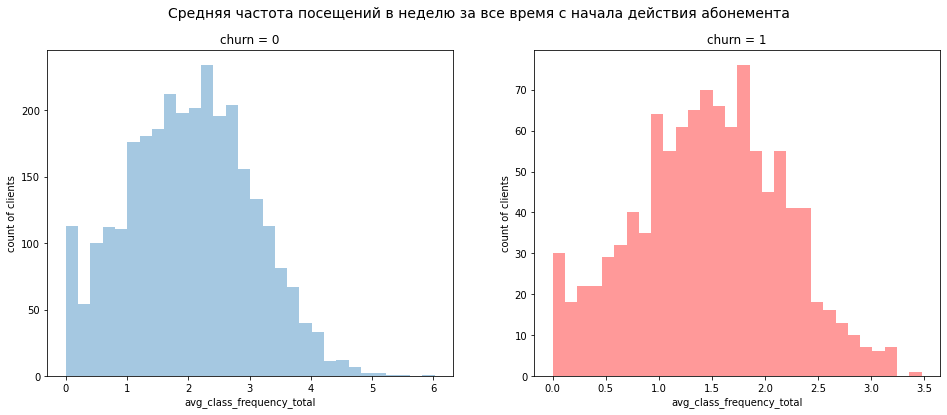

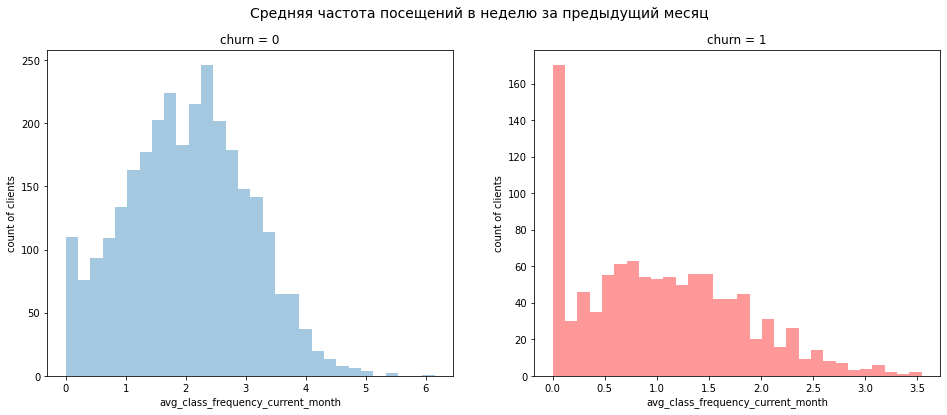

In [16]:
for feature in X.columns: 
    fig, ax = plt.subplots(1,2,figsize=(16, 6))
    
    title = feature_name.query('name == @feature').iloc[0]['rus_name']

    sns.distplot(data.query('churn == 0')[feature], ax=ax[0], bins=30, kde=False, label='churn = 0').set(
        title='churn = 0', xlabel=feature, ylabel='count of clients')
    sns.distplot(data.query('churn == 1')[feature], ax=ax[1], bins=30, kde=False, color='r', label='churn = 1').set(
        title='churn = 1', xlabel=feature, ylabel='count of clients')
    
    plt.suptitle(title, fontsize=14)
    plt.show()

In [17]:
data.groupby('churn').median()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,1,1,1,0,1,6,0,30,149.881171,6.0,4,2.043252,2.046697
1,1,1,0,0,1,1,0,27,103.814686,1.0,1,1.491187,0.979445


Все категориальные переменные в нашем датасете имеют только два значения: 0 и 1. Соотвественно среднее - это доля значений с единицей. На гистограммах как раз видно, что в группе тех, кто ушел в отток, доля значений с нулями выше, чем у группы оставшихся клиентов. Исключение - признаки пол и телефон. Там доли значений практически совпадают, поэтому их средние почти не отличаются.

Теперь рассмотрим числовые признаки. На гистограммах длительности текущего абонемента видно, что те, кто остался, хотя и чаще всего покупали абонементы на 1 месяц, но доли абонементов на 6 и 12 месяцев тоже высоки. Тогда как в группе ушедших основной вид абонемента - на 1 месяц. Доля остальных абонементов очень мала. 

Гистограммы возраста в обеих группах похожи на стандартное нормальное распределение, при этом в группе оставшихся медиана находится около 30 лет, а у группы ушедших медиана в раойне 27 лет. 

На гистограмме суммарной выручки от других услуг финтес-центра видно, что в группе оставшихся основная часть значений сосредоточена на отрезке от 0 до 200 и потом идет резкое уменьшение количества значений, медиана около 150. В группе ушедших резкое уменьшение идет после 150, а медиана в районе 100. То есть видно, что те, кто ушел, тратили денег меньше.

На гистограмме срока до окончания дейтсвия текущего абонемента в группе оставшихся самые частые значения - это 1, 6 и 12 месяцев - как и на гистограмме длительности текущего абонемента. То есть в основом в исследовании клиенты, которые только начали пользоваться своим абонементом. В группе ушедших самое частое значение - 1 месяц. 

Время с момента первого обращения в фитнес-центр на гистограмме оставшихся имеет значения от 0 до 20, после 20 месяцев значений почти нет. Медиана составила 4 месяца. На гистограмме ушедших в отток самые частые значения - это 1 месяц, 0 месяцев и 2 месяца. Медиана составила 1 месяц. 

Средняя частота посещений в неделю за все время действия абонемента у тех, кто остался, имеет медиану в районе 2 раз в неделю, самое частое значение в районе 2,5 раз в неделю. В группе ушедших в отток медиана в районе 1,5 раз в неделю, а самое частое значение в районе 2 раз в неделю. 

На гистограмме средней частоты посещений в неделю за прошедший месяц в группе оставшихся медиана в районе 2, самое частое значение в районе 2,5. Вообще все это распределение похоже на гистограмму средней частоты посещений за весь период. А вот гистограммы ушедших в отток отличаются для всего периода и за последний месяц. Видно, что за последний месяц у тех, кто ушел в отток, самое частое значение - это 0 посещений в неделю, и оно очень сильно преобладает над другими значениями. Медиана этого распределения находится в районе 1 посещения в неделю.

По виду гистограмм можем сделать вывод, что у клиентов, ушедших в отток, все распределения смещены влево в сторону нулевых значений относительно распредлений группы оставшихся.

### Матрица корреляций <a id="corr_matrix"></a>

Построим теперь матрицу корреляций для признаков.

In [18]:
cm = data.corr()

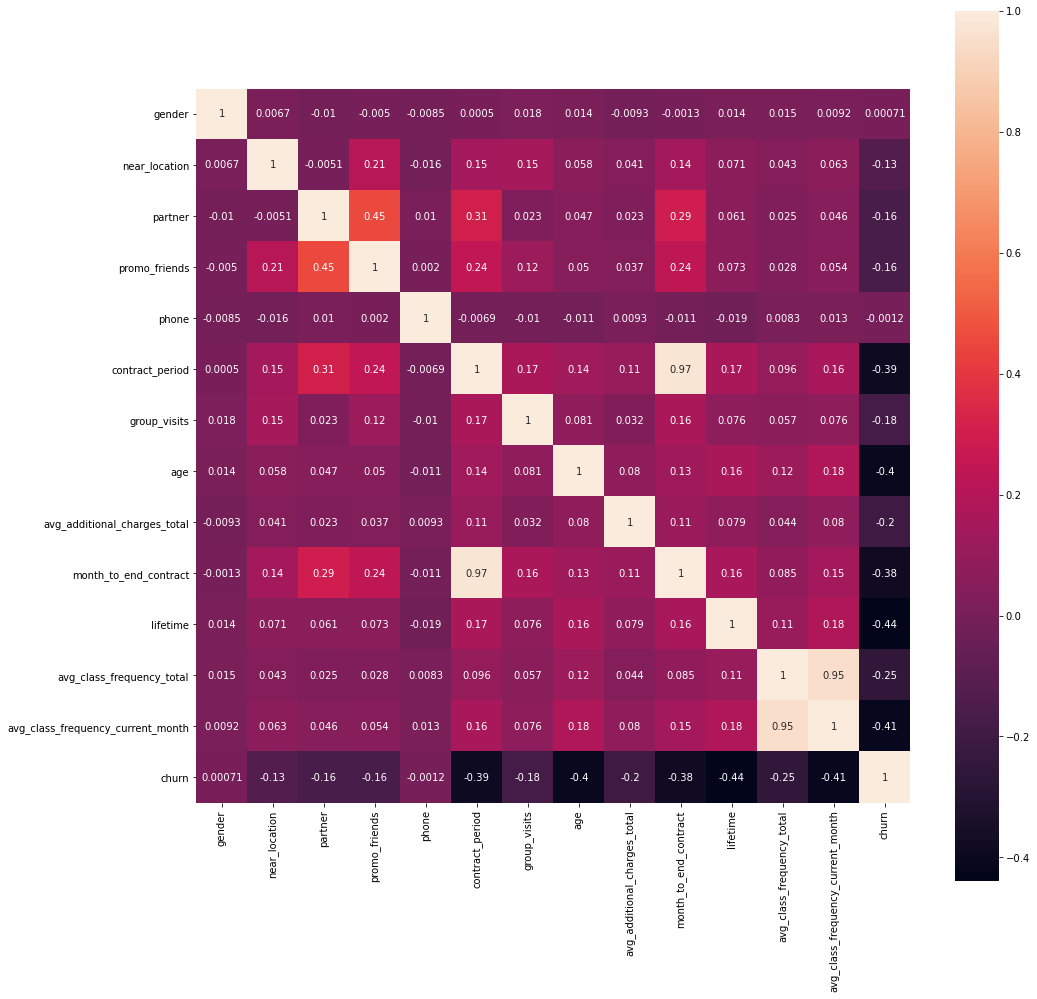

In [19]:
fig, ax = plt.subplots(1,1,figsize=(16, 16))
sns.heatmap(cm, annot = True, square=True)
plt.show()

Наиболее сильно с целевой переменной `churn` коррелируют следующие признаки:
 * -0.44 - `lifetime` или время с момента первого обращения в фитнес-центр - тут средней силы обратная зависимость. То есть чем меньше время жизни, тем вероятней пользователь уйдет в отток;
 * -0.41 - `avg_class_frequency_current_month` или средняя частота посещений в неделю за предыдущий месяц - тут тоже средней силы обратная зависимость, то есть чем меньше посещений в неделю за последний месяц, тем вероятней пользователей уйдет в отток;
 * -0.4 - `age` или возраст - тут тоже обратная зависимость, значит чем младше клиент, тем он вероятней уйдет в отток;
 * -0.39 - `contract_period` или длительность текущего действующего абонемента - тут тоже обратная зависимость, то есть чем меньше срок последнего купленного абонемента, тем вероятней клиент уйдет в отток;
 * -0.38 - `month_to_end_contract` или срок до окончания текущего действующего абонемента - и здесь обратная зависимость, то есть чем меньше срок до окончания абонемента, тем вероятней клиент уйдет в отток.
 
Самая слабая корреляция между оттоком и полом и оттоком и наличием телефона. Это и ожидаемо, так как на этих признаках не менялось среднее в зависимости о того ушел клиент в отток или остался.

Сильнее всего между собой коррелируют следующие признаки:
 * 0.97 - `month_to_end_contract` и `contract_period` или срок до окончания текущего абонемента имеет очень сильную прямую зависимость с длительностью текущего действующего абонемента. Это было заметно и по гистограммам распределения этих признаков, так как самые частые значения у них были одинаковые. То есть скорей всего мы исследуем в основном клиентов, которые только что купили новый абонемент.
 * 0.95 - `avg_class_frequency_total` и `avg_class_frequency_current_month` или средняя частота посещений в неделю за все время с начала действия абонемента имеет очень сильную прямую зависимость со средней частотой посещений в неделю за предыдущий месяц. Это было заметно на гистограммах тех, кто остался - распределения этих признаков практически совпадали. Однако распределения различались у тех, кто ушел в отток. Чаще всего те, кто ушел в отток совсем перестали приходить в фитнес-центр. 
 
Так как мы будем прогнозировать, ушел клиент в отток или остался, то это задача бинарной классификации. Один из способов построить модель для такой задачи - это логистическая регрессия. А она критична к мультиколлинеарности. Так что при построении модели нужно будет учесть эти признаки.

## Построение модели прогнозирования оттока клиентов

Нам необходимо построить модель бинарной классификации, где целевой признак - факт оттока клиента в следующем месяце. Для начала разобьем выборку на обучающую и валидационную.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Теперь проведем стандартизацию наших признаков. Создадим объект класса StandardScaler и применим его к обучающей выборке.

In [21]:
scaler = StandardScaler()

Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки.

In [22]:
X_train_st = scaler.fit_transform(X_train)

Применяем стандартизацию к матрице признаков для тестовой выборки.

In [23]:
X_test_st = scaler.transform(X_test)

Обучим модель логистической регрессией. Чтобы модель была более устойчива к мультиколлинеарности, зададим параметр `solver` равным значению `lbfgs`. Этот `solver` поддерживает L2-регуляризацию, которая более устойчива к мультиколлинеарности, чем L1-регуляризация.

In [24]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_st, y_train)

LogisticRegression()

Сделаем прогнозы.

In [25]:
y_pred = log_reg.predict(X_test_st)
y_prob = log_reg.predict_proba(X_test_st)[:,1] 

Выведем метрики классификации:

In [26]:
metrics_class = pd.DataFrame({'model': 'logistic_regression_all_features', 
                              'accuracy': np.round(accuracy_score(y_test, y_pred), 3),
                             'precision': np.round(precision_score(y_test, y_pred), 3),
                             'recall': np.round(recall_score(y_test, y_pred), 3),
                             'f1': np.round(f1_score(y_test, y_pred), 3),
                             'roc_auc': np.round(roc_auc_score(y_test, y_prob), 3)}, 
                             index=[0])


In [27]:
metrics_class

,model,accuracy,precision,recall,f1,roc_auc
0,logistic_regression_all_features,0.922,0.854,0.828,0.841,0.971


Теперь обучим модель с помощью случайного леса.

In [28]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

In [29]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [30]:
y_pred = rf_model.predict(X_test_st)
y_prob = rf_model.predict_proba(X_test_st)[:,1] 

Теперь посчитаем метрики:

In [31]:
metrics_class = metrics_class.append({'model': 'random_forest', 
                                      'accuracy': np.round(accuracy_score(y_test, y_pred), 3),
                                      'precision': np.round(precision_score(y_test, y_pred), 3),
                                      'recall': np.round(recall_score(y_test, y_pred), 3),
                                      'f1': np.round(f1_score(y_test, y_pred), 3),
                                      'roc_auc': np.round(roc_auc_score(y_test, y_prob), 3)},
                                       ignore_index=True)

In [32]:
metrics_class

,model,accuracy,precision,recall,f1,roc_auc
0,logistic_regression_all_features,0.922,0.854,0.828,0.841,0.971
1,random_forest,0.915,0.839,0.813,0.826,0.968


Так как соотношене классов у нас где-то 75% на 25%, то есть баланаса классов нет, то доля правильных ответов  - метрика accuracy - не подходит для оценки наших моделей. Но все остальные метрики у логистический регрессии также выше, чем у модели случайного леса. Значит мы можем утверждать, что для прогнозирования оттока клиентов сети фитнес-центров модель логистической регрессии работает лучше, чем модель случайного леса. При этом судя по метрикам логистическая регрессия хорошо справляется с поставленной задачей:
 * precision или точность составила 0.854, то есть доля правильных ответов среди целевого класса у модели логистической регрессии - 85.4%;
 * recall или полнота составила 0.828, то есть мы смогли обнаружить 82.8% реальных клиентов, ушедших в отток с помощью модели логистической регрессии;
 * f1-мера, метрика, которая учитывает баланс между precision и recall, у логистической регрессии выше, чем у модели случайного леса, и составила 0.841;
 * roc-auc или площадь под кривой ошибок составила 0.971 у логистической модели, что тоже выше, чем у модели случайного леса.

## Кластеризация клиентов

Попробуем спрогнозировать классы для клиентов фитнес-центров. Для этого возьмем полный набор всех признаков и стандартизируем его.

In [33]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

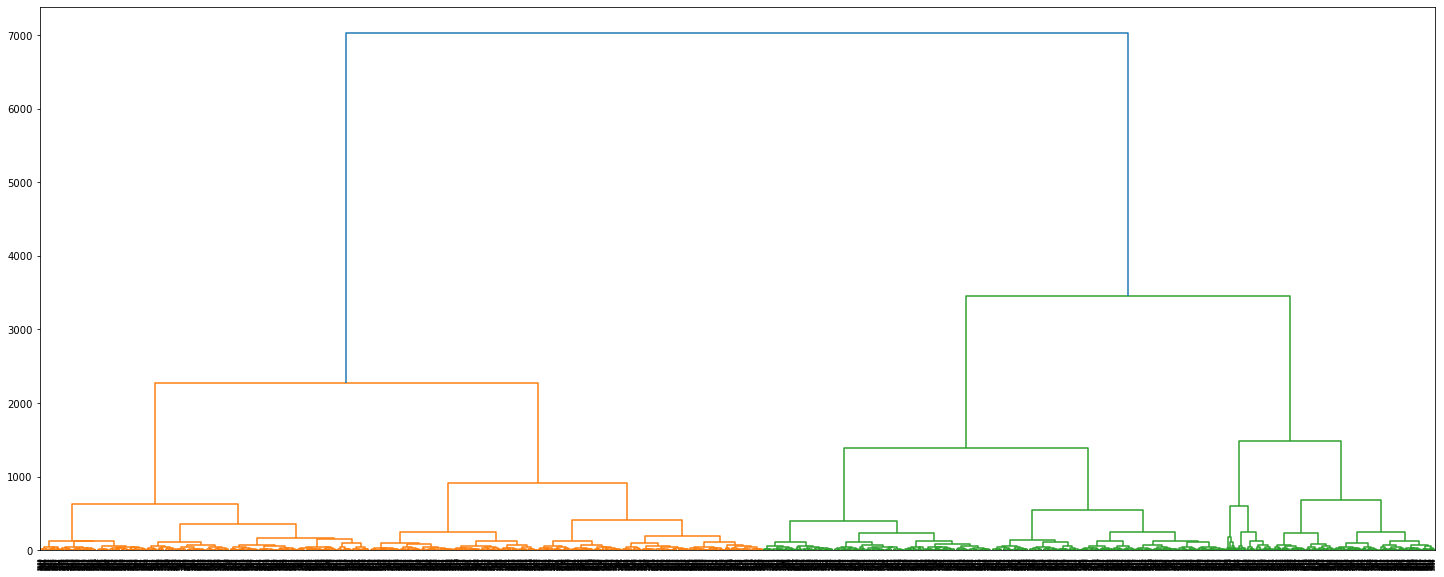

In [34]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Судя по дендрограмме у нас 2 больших класса или 4 кластера поменьше. 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Чтобы наши резльтаты были сравнимы с результами других студентов, возьмем число кластеров равным 5.

In [35]:
km = KMeans(n_clusters = 5, random_state=42)

In [36]:
labels = km.fit_predict(X_sc)

In [37]:
data_cluster = data
data_cluster['cluster'] = labels

In [38]:
data_cluster.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,4
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2


Теперь посчитаем средние значения признаков для каждого кластера.

In [39]:
data_cluster.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.484536,1.000000,0.350515,0.238699,1.000000,1.953212,0.340999,28.165741,131.686305,1.861221,2.432197,1.247327,1.012716,0.514671
3,0.560284,0.976359,0.360520,0.236407,0.998818,2.689125,0.470449,30.114657,161.376306,2.479905,4.892435,2.848556,2.846788,0.067376
4,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916


 * 0-й кластер выделяется тем, что почти все клиенты - 99.84% этого класса пришли по акции "приведи друга" и почти все они ходят в финес-центры рядом с работой или домом. Также 83% этого класса имеют скидку на абонемент от своей компании - партнера фитнес-центра.1.7 раз в неделю за последний месяц. Ходят в зал они не часто: 1.8 раз в неделю за весь период и В этом кластере ушедших в отток почти 25%. Назовем этот кластер <i>"скидочники"</i>.
 
 * 1-й кластер выделяется тем, что имеет один из самых низких показателей оттока - 9% и только 5% клиентов этого кластера пришли по акции "приведи друга." Эти клиенты ходят в фитнес-центр чаще других: 2.7 раза в неделю за весь период и за последний месяц. У этого кластера самый высокий показатель времение жизни - 4.8 месяцев. Назовем этот кластер <i>"спортсмены"</i>.
 
 * 2-й кластер выделяется тем, что большинство клиентов купили абонемент на 12 месяцев - среднее значение признака `contract_period` составило 11.85 месяцев. Почти все ходят в фитнес-центры рядом с работой или домом. Они больше всего тратят денег на другие услуги фитнес-центра. Ходят в среднем два раза в неделю. У этого кластера самый низкий показатель оттока - всего 2% и один из самых высоких показателей времени жизни - 4.7 месяцев. Этот кластер назовем <i>"ядро"</i>.
 
 * 3-й кластер. Здесь самая низкая частота посещений в неделю: за весь период - 1.22 раза в неделю и почти 1 раз в неделю за последний месяц. Самый низкая длительность жизни - 2.2 месяца и самый высокий показатель оттока - 57.3%. Также в этом кластере почти 30% клиентов живут или работают далеко от фитнес-центра и только 2% этого класса пришли по акции "приведи друга". У этого кластера самое низкое значение текущего абонемента - 1.9 месяца. Назовем этот кластер <i>"немотированные"</i>.
 
 * 4-й кластер выделяется тем, что у этих клиентов не указаны телефоны. 86% живут или работают рядом с фитнес-центрами. У них второй по средней длительности период последнего абонемента - 4.8 месяцев. Среднее время жизни почти 4 месяца. Ходят они не очень часто 1.8 раз в неделю за весь период и 1.7 раз в неделю за последний месяц. Процент тех, кто ушел в отток, в этом кластере составил 26.7%. Назовем этот кластер <i>"шифрующиеся"</i>.

Посчитаем размер каждого кластера.

In [40]:
data_cluster.groupby('cluster')['gender'].count()

cluster
0     505
1     385
2    1261
3     846
4    1003
Name: gender, dtype: int64

Больше всего клиентов попало в кластер <i>"немотированных"</i>. А самый маленький кластер - это <i>"шифрующиеся"</i>.

Построим гистограммы распределения признаков для кластеров. Только добавим в датасет с названиями признаков еще и отток.

In [41]:
feature_name = feature_name.append({'name': 'churn', 'rus_name': 'ушли в отток', 'type': 'category'}, ignore_index=True)

In [42]:
feature_name

,name,rus_name,type
0,gender,Пол,category
1,near_location,Рядом фитнес-центр,category
2,partner,Сотрудник компании-партнера клуба,category
3,promo_friends,"Пришел по акции ""приведи друга""",category
4,phone,Телефон,category
5,contract_period,"Длительность текущего абонемента, в месяцах",number
6,group_visits,Посещал групповые занятия,category
7,age,Возраст,number
8,avg_additional_charges_total,Cуммарная выручка от других услуг фитнес-центра,number
9,month_to_end_contract,"Срок до окончания текущего абонемента, в месяцах",number


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


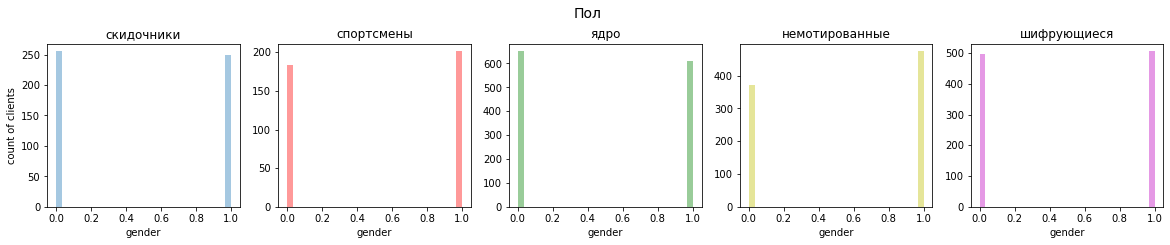

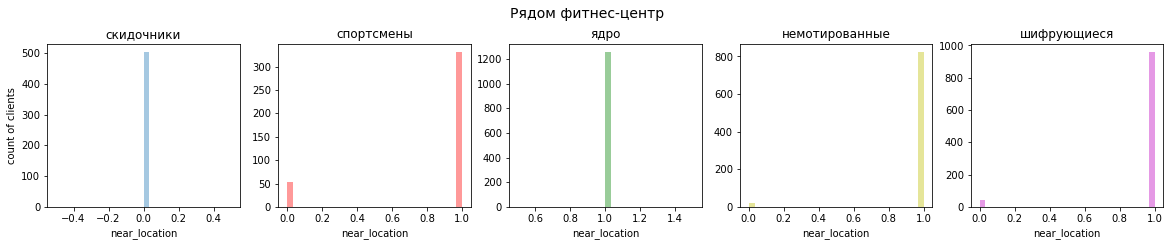

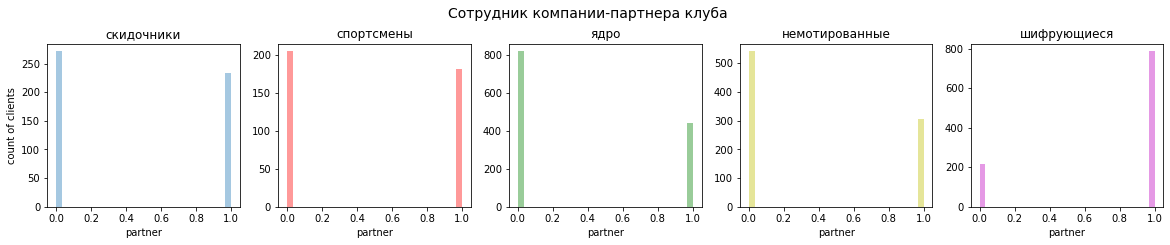

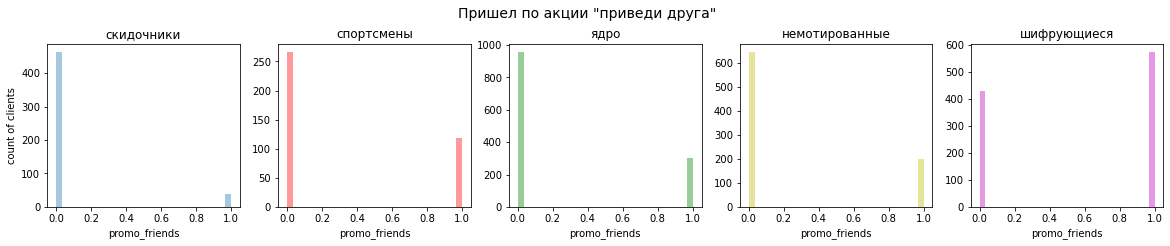

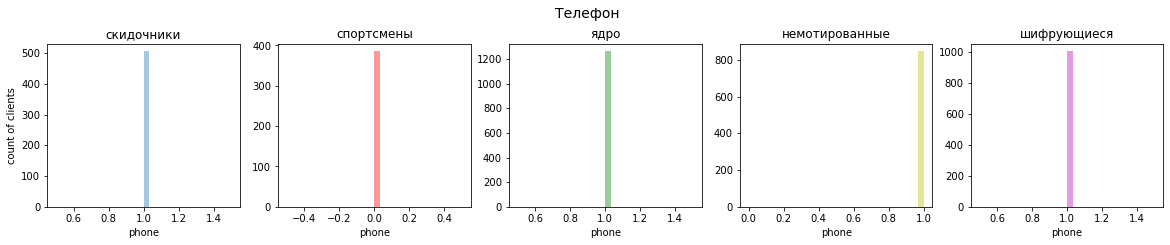

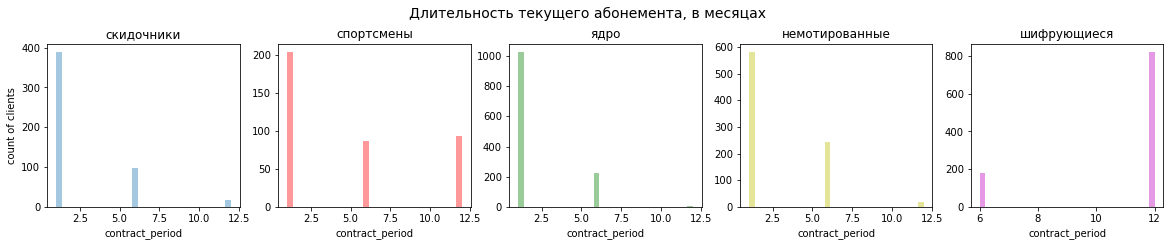

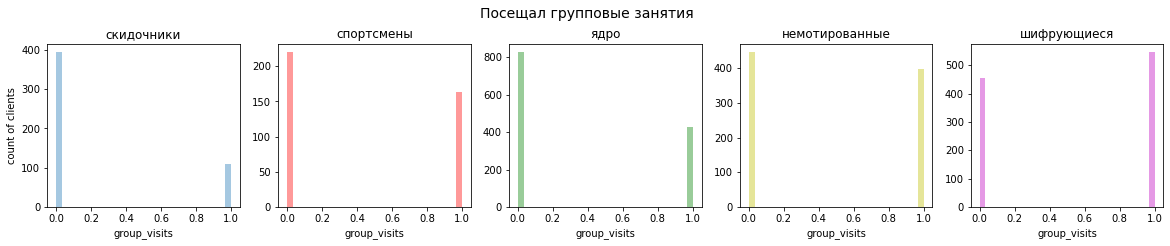

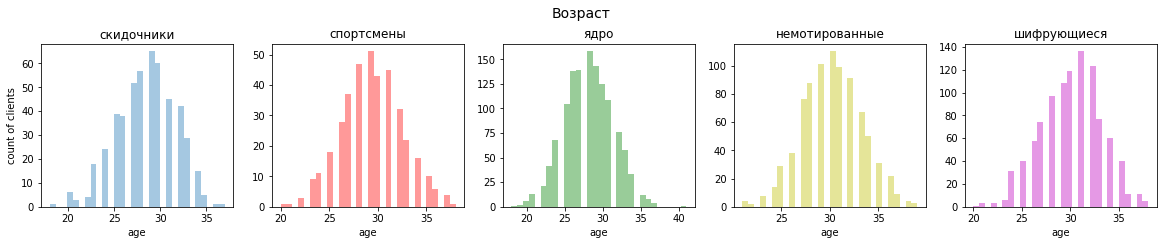

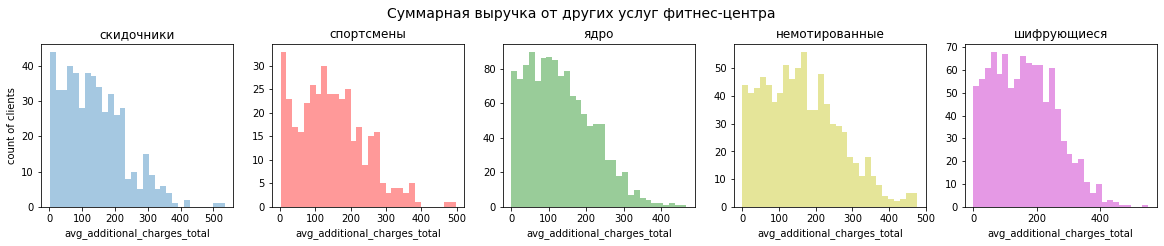

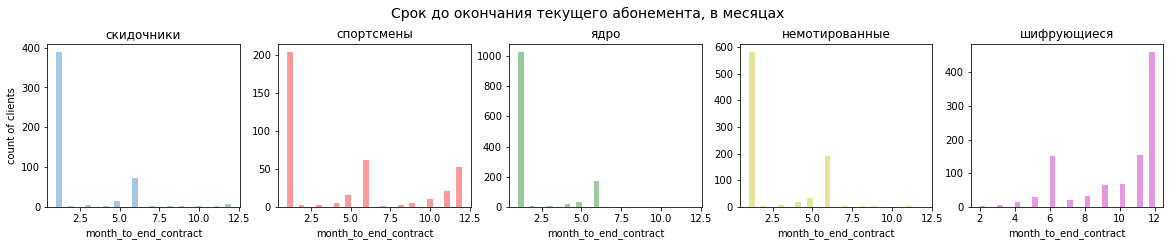

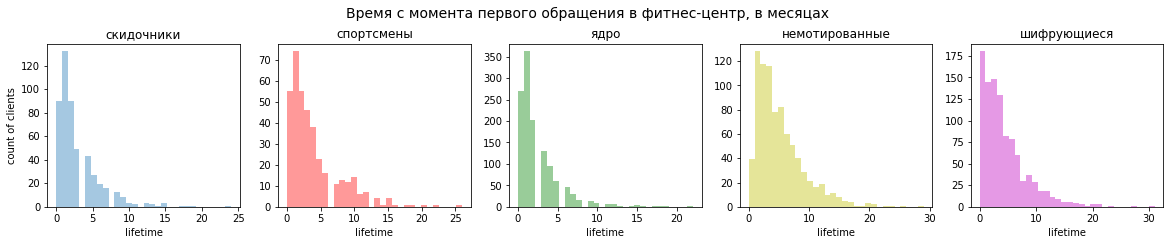

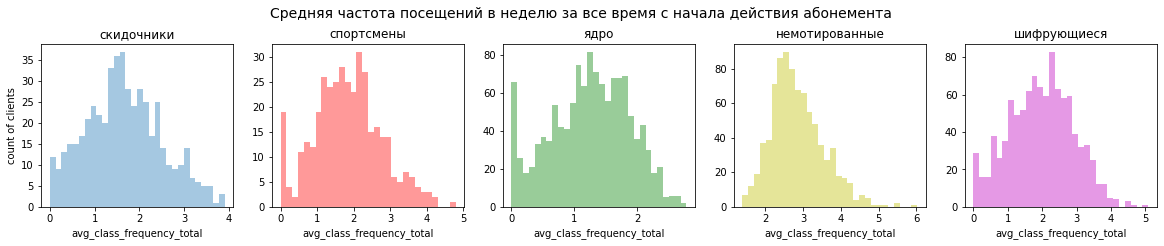

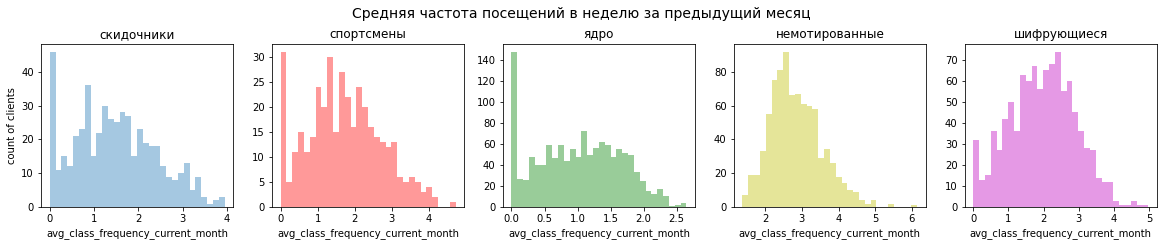

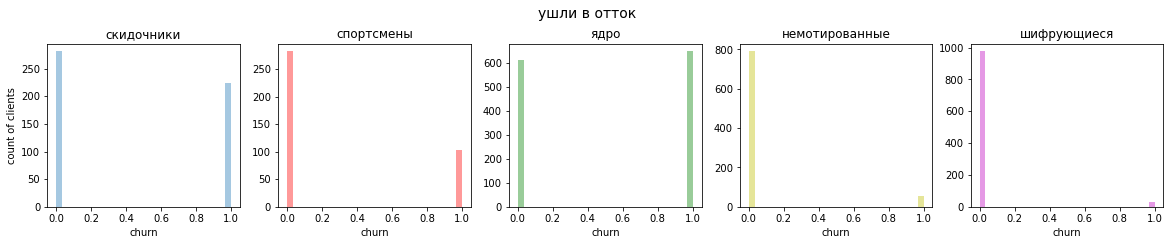

In [43]:
for feature in feature_name['name']: 
    fig, ax = plt.subplots(1,5,figsize=(20, 3))
    
    title = feature_name.query('name == @feature').iloc[0]['rus_name']

    sns.distplot(data_cluster.query('cluster == 0')[feature], ax=ax[0], bins=30, kde=False, label='скидочники').set(
        title='скидочники', xlabel=feature, ylabel='count of clients')
    sns.distplot(data_cluster.query('cluster == 1')[feature], ax=ax[1], bins=30, kde=False, color='r', label='спортсмены').set(
        title='спортсмены', xlabel=feature)
    sns.distplot(data_cluster.query('cluster == 2')[feature], ax=ax[2], bins=30, kde=False, color='g', label='ядро').set(
        title='ядро', xlabel=feature)
    sns.distplot(data_cluster.query('cluster == 3')[feature], ax=ax[3], bins=30, kde=False, color='y', label='немотированные').set(
        title='немотированные', xlabel=feature)
    sns.distplot(data_cluster.query('cluster == 4')[feature], ax=ax[4], bins=30, kde=False, color='m', label='шифрующиеся').set(
        title='шифрующиеся', xlabel=feature)
    
    plt.suptitle(title, fontsize=14, y=1.05)
plt.show()

Все категориальные признаки и отток имеют значения только 0 и 1, поэтому их распределения хорошо описываются средним - то есть среднее показывает долю значений с "1". В поле "ушли в отток" самая большя доля у кластера <i>"немотивированных"</i>. Это видно и по цифрма и по графику. А у кластеров <i>"спортсмены"</i> и <i>"ядро"</i> ушедших в отток практически нет.  

Пол во всех кластерах примерно одинаково распределяется. 
|
Рядом с фитнес-центрами живут и работают <i>"скидочники"</i> и <i>"ядро"</i>. У <i>"немотивированных"</i> самая большая доля тех, кто живет или работает далеко от зала.

У <i>"скидочников"</i> самая большая доля тех, кто имеет скидку от работы - она компания-партнер фитнес-центра. А у <i>"спортсменов"</i> и <i>"немотивированных"</i> наоборот велика доля тех, у кого не было скидки от работы.

Почти все <i>"скидочники"</i> пришли по акции "приведи друга", а <i>"немотивированные"</i> и <i>"спортсмены"</i> пришли сами.

Групповые занятия меньше всех посещали <i>"немотивированные"</i>.

А <i>"шифрующиеся"</i> не указали телефон.

Посмотрим на числовые признаки. 

Длительность текущего абонемента:
 * у кластера <i>"скидочники"</i> самые частые значения - это 1 и 6 месяцев. 12-тимесясячные абонементы они не покупали.
 * у кластера <i>"спортсмены"</i> тоже самые частые значения - это 1 и 6 месяцев и совсем чуть-чуть абонементов на 12 месяцев.
 * у кластера <i>"ядро"</i> - почти все купили абонемент на 12 месяцев.
 * у кластера <i>"немотивированные"</i> основная длительность - это 1 месяц и небольшой процент абонементов на 6 месяцев.
 * у кластера <i>"шифрующиеся"</i> половина абонементов на 1 месяц, но оставшиеся 50% практически поровну делятся между 6 и 12 месяцами.
 
Возраст у всех кластеров примерно одинаковый в районе 28-30 лет.

Суммарная выручка от других услуг примерно одинаково распределена у всех кластеров. Однако у кластеров <i>"скидочники"</i>, <i>"немотивированные"</i> и <i>"шифрующиеся"</i> очень часто встречаются нулевые значения.

Срок до окончания текущего абонемента коррелирует с длительностью текущего абонемента в кластерах.

Время жизни самое короткое у <i>"немотивированных"</i>.

Средняя частота посещений в неделю за весь период и за последний месяц у <i>"спортсменов"</i> самая высокая и не имеет нулевых значений. В других кластеров нулевые значения присутствуют в обоих признаках. Особенно выделяются кластеры <i>"немотивированных"</i>, <i>"скидочников"</i> и <i>"шифрующихся"</i>, где за последний месяц самое частое значение количества посещений в неделю - это 0 посещений. У <i>"немотивированных"</i> нулевое значение лидирует с большим отрывом.

## Выводы <a id="output"></a>

Перед нами стояли следующие задачи: 
 1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 2. сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 3. проанализировать основные признаки, наиболее сильно влияющие на отток;
 4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * выделить целевые группы клиентов;
    * предложить меры по снижению оттока;
    * определить другие особенности взаимодействия с клиентами.
    
В нашем распоряжении были данные о 4000 клиентах фитнес-центра, которые не требовали особой обработки. У каждого клиента было отмечено 13 признаков и был один столбец, в котором указывалось, ушел клиент в отток или остался.

С помощью двух моделей бинарной классификации (логистической регрессии и случайного леса) мы построили две прогнозных модели и сравнили их между собой. У логистической регрессии все метрики классификации были лучше, чем у случайного леса и составили:
 * accuracy или доля правильных ответов составила 0.922 у логистической регрессии против 0.915 у случайного леса. Но так как у нас нет баланса классов, то эта метрика не подходит для оценки наших моделей;
 * precision или точность составила 0.854, то есть доля правильных ответов среди целевого класса у модели логистической регрессии - 85.4% против 83.9% у случайного леса;
 * recall или полнота составила 0.828, то есть мы смогли обнаружить 82.8% реальных клиентов, ушедших в отток с помощью модели логистической регрессии. У случайного леса эта метрика составила только 81.3% клиентов, ушедших в отток;
 * f1-мера, метрика, которая учитывает баланс между precision и recall, у логистической регрессии выше, чем у модели случайного леса, и составила 0.841, тогда как у случайного леса она составила 0.826;
 * roc-auc или площадь под кривой ошибок составила 0.971 у логистической модели, что тоже выше, чем у модели случайного леса, у которой эта метрика составила 0.968.
 
При это все метрики показывают высокие результаты. Это значит, что с помощью логистической регрессии мы сможем строить достачтоно достоверные прогнозы оттока клиентов.

С помощью модели K-means мы определили 5 кластеров клиентов, которые имеют следующие описания:
 * 0-й кластер выделяется тем, что почти все клиенты - 99.84% этого класса пришли по акции "приведи друга" и почти все они ходят в финес-центры рядом с работой или домом. Также 83% этого класса имеют скидку на абонемент от своей компании - партнера фитнес-центра.1.7 раз в неделю за последний месяц. Ходят в зал они не часто: 1.8 раз в неделю за весь период и В этом кластере ушедших в отток почти 25%. Назовем этот кластер <i>"скидочники"</i>.
 
 * 1-й кластер выделяется тем, что имеет один из самых низких показателей оттока - 9% и только 5% клиентов этого кластера пришли по акции "приведи друга." Эти клиенты ходят в фитнес-центр чаще других: 2.7 раза в неделю за весь период и за последний месяц. У этого кластера самый высокий показатель времение жизни - 4.8 месяцев. Эти клиенты не пропускают ни одной недели. Назовем этот кластер <i>"спортсмены"</i>.
 
 * 2-й кластер выделяется тем, что большинство клиентов купили абонемент на 12 месяцев - среднее значение признака `contract_period` составило 11.85 месяцев. Почти все ходят в фитнес-центры рядом с работой или домом. Они больше всего тратят денег на другие услуги фитнес-центра. Ходят в среднем два раза в неделю. У этого кластера самый низкий показатель оттока - всего 2% и один из самых высоких показателей времени жизни - 4.7 месяцев. Этот кластер назовем <i>"ядро"</i>.
 
 * 3-й кластер. Здесь самая низкая частота посещений в неделю: за весь период - 1.22 раза в неделю и почти 1 раз в неделю за последний месяц. Самый низкая длительность жизни - 2.2 месяца и самый высокий показатель оттока - 57.3%. Также в этом кластере почти 30% клиентов живут или работают далеко от фитнес-центра и только 2% этого класса пришли по акции "приведи друга". У этого кластера самое низкое значение текущего абонемента - 1.9 месяца. Назовем этот кластер <i>"немотированные"</i>.
 
 * 4-й кластер выделяется тем, что у этих клиентов не указаны телефоны. 86% живут или работают рядом с фитнес-центрами. У них второй по средней длительности период последнего абонемента - 4.8 месяцев. Среднее время жизни почти 4 месяца. Ходят они не очень часто 1.8 раз в неделю за весь период и 1.7 раз в неделю за последний месяц. Процент тех, кто ушел в отток, в этом кластере составил 26.7%. Назовем этот кластер <i>"шифрующиеся"</i>.
 
Наиболее сильно с оттоком коррелируют следующие признаки:
 * `lifetime` или время с момента первого обращения в фитнес-центр;
 * `avg_class_frequency_current_month` или средняя частота посещений в неделю за предыдущий месяц;
 * `age` или возраст;
 * `contract_period` или длительность текущего действующего абонемента;
Все они имеют среднюю обратную зависимость, то есть чем ниже эти признаки, тем вероятней клиент уйдет в отток.

Это заметно и по распределениям:
* На гистограммах длительности текущего абонемента видно, что те, кто остался, хотя и чаще всего покупали абонементы на 1 месяц, но доли абонементов на 6 и 12 месяцев тоже высоки. Тогда как в группе ушедших основной вид абонемента - на 1 месяц. Доля остальных абонементов очень мала. 
* В группе оставшихся медиана распределения находится около 30 лет, а у группы ушедших медиана в раойне 27 лет. То есть в среднем ушедшие в отток клиенты моложе, чем оставшиеся.
* Время с момента первого обращения в фитнес-центр на гистограмме оставшихся имеет значения от 0 до 20, после 20 месяцев значений почти нет. Медиана составила 4 месяца. На гистограмме ушедших в отток самые частые значения - это 1 месяц, 0 месяцев и 2 месяца. Медиана составила 1 месяц. 
* На гистограмме средней частоты посещений в неделю за прошедший месяц в группе оставшихся медиана в районе 2, самое частое значение в районе 2,5. Вообще все это распределение похоже на гистограмму средней частоты посещений за весь период. А вот гистограммы ушедших в отток отличаются для всего периода и за последний месяц. Видно, что за последний месяц у тех, кто ушел в отток, самое частое значение - это 0 посещений в неделю, и оно очень сильно преобладает над другими значениями. Медиана этого распределения находится в районе 1 посещения в неделю.

Исходя из результатов исследований, выделим целевые группы клиентов. Это <i>"ядро"</i> и <i>"спортсмены"</i>. У этих клиентов самые низкие показатели оттока, самое длинное время жизни и они чаще других посещают зал.  Поэтому желательно проводить мероприятия, чтобы клиентов из других кластеров переводить в эти два. 
Чтобы снизить отток, можно попробовать провести следующие мероприятия:
 * Вероятность уйти в отток у клиентов с абонементом на 6 и 12 месяцев меньше, чем у клиентов с абонементом на 1 месяц. Поэтому нужно стараться продавать абонементы на более длительный срок. В качестве предложения можно клиентам с абонементами на 1 месяц попробовать предлагать абонеменеты на большее количество месяцев со скидкой. Эта акция возможно повлияет на <i>"немотивированных"</i>, потому что они свои абонементы чаще всего покупали без скидок. Также есть вероятность, что она может повлиять на <i>"шифрующихся"</i> и <i>"спортсменов"</i>, так как они тоже часто приходят без скидок. 
 * Клиентов нужно возвращать в зал, так как когда они начинают реже ходить, то вероятность оттока увеличивается. Тогда если у клиента средняя посещаемость в неделю за последний месяц становится ниже средней посещаемости за весь период, тогда попробовать предложить им несколько занятий с тренером бесплатно или со скидкой или бесплатную или со скидкой платную услугу (массаж, например). 
 * Также для уменьшения оттока нужно увеличивать время жизни клиентов фитнес-центров. В качестве меры можно провести подобную акцию: "Если ходишь 3 раза в неделю в течение 4-х недель, то получи напиток/массаж/др. бесплатную услугу бесплатно или со скидкой." Это конечно будет больше мотивировать ходить итак уже замотивированные группы клиентов, но может и на остальных повлияет.
 * Можно поздравлять клиентов с днем рождения и дарить им в подарок одну из дополнительных услуг. Это повышает лояльность клиентов и возможно увеличит их время жизни. 